<a href="https://colab.research.google.com/github/AnabelBerumen/DataScientist/blob/main/estad%C3%ADstica/Regresi%C3%B3n_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ➰Las matemáticas tras la regresión logística

### Las tablas de contingencia

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Gender Purchase.csv')
df.head()

,Gender,Purchase
0,Female,Yes
1,Female,Yes
2,Female,No
3,Male,No
4,Male,Yes


In [ ]:
df.shape

(511, 2)

In [ ]:
# Tabla de contingencia
# con que fecuencia ocurre un determinado suceso
contingency_table = pd.crosstab(df['Gender'], df['Purchase'])
contingency_table

Purchase,No,Yes
Gender,,
Female,106,159
Male,125,121


In [ ]:
# Sumamos horizontalmente
contingency_table.sum(axis = 1)

Gender
Female    265
Male      246
dtype: int64

In [ ]:
# Sumamos verticalmente
contingency_table.sum(axis = 0)

Purchase
No     231
Yes    280
dtype: int64

In [ ]:
# la trabajamos como float para poder hacer la división
# Sumamos horizonta, regresamos de manera vertical
contingency_table.astype('float').div(contingency_table.sum(axis=1), axis= 0)

Purchase,No,Yes
Gender,,
Female,0.40000,0.60000
Male,0.50813,0.49187


In [ ]:
from IPython.display import display, Math, Latex

## ➰Probabilidad condicional
##### Cuál es la probabilidad de que un cliente compre un producto sabiendo que es un hombre?
##### Cuál es la probabilidad de que sabiendo que un cliente compra un producto sea mujer?

In [ ]:
display(Math(r'P(Purchase|Male) = \frac{Numero\ total\ de\ compras\ hechas\ por\ hombres}{Numero\ total\ de\ hombres\ del\ grupo} = \frac{Purchase\cap Male }{Male}'))
121/246

<IPython.core.display.Math object>

0.491869918699187

In [ ]:
display(Math(r'P(No\ Purchase|Male) = 1-P(Purchase|Male)'))
125/246

<IPython.core.display.Math object>

0.508130081300813

In [ ]:
display(Math(r'P(Female|Purchase) = \frac{Numero\ total\ de\ compras\ hechas\ por\ mujeres}{Numero\ total\ de\ compras} = \frac{Female\cap Purchase }{Purchase}'))
159/280

<IPython.core.display.Math object>

0.5678571428571428

In [ ]:
display(Math(r'P(Male|Purchase)'))
121/280

<IPython.core.display.Math object>

0.43214285714285716

In [ ]:
print('-'*50)
display(Math(r'P(Purchase | Male)'))
print(121/246)
print('-'*50)
display(Math(r'P(NO\ Purchase|Male)'))
print(125/246)
print('-'*50)
display(Math(r'P(Purchase| Female)'))
print(159/265)
print('-'*50)
display(Math(r'P(NO\ Purchase| Female)'))
106/265
print('-'*50)

--------------------------------------------------


<IPython.core.display.Math object>

0.491869918699187
--------------------------------------------------


<IPython.core.display.Math object>

0.508130081300813
--------------------------------------------------


<IPython.core.display.Math object>

0.6
--------------------------------------------------


<IPython.core.display.Math object>

--------------------------------------------------


### ➰Ratio de probabilidades
cociente entre los casos de exito para c/u de los grupos
en este caso ser hombre/mujer respectivamente.


El ratio de exitos para un grupo determinado se define
como el cociente de las probabilidades de exito de que
el suceso que estamos estudiando tenga exito entre la 
probabilidad de fracaso, en este caso que no tengamos
una compra.

In [ ]:
display(Math(r'P_m = \ probabilidad\ de\ hacer\ compra\ sabiendo\ que\ es\ un\ hombres'))
display(Math(r'odds_{purchase,male} = \frac{P_m}{1-P_m} = \frac{N_{p,m}}{N{\bar p,m}}'))
print('-'*59)


display(Math(r'P_m = \ probabilidad\ de\ hacer\ compra\ sabiendo\ que\ es\ una\ mujer'))
display(Math(r'odds_{purchase,male} = \frac{P_f}{1-P_f} = \frac{N_{p,f}}{N{\bar p,f}}'))
print('-'*59)

display(Math(r'odds\in[0, +\infty]'))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

-----------------------------------------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

-----------------------------------------------------------


<IPython.core.display.Math object>

In [ ]:
pm = 121/246
pf = 159/265
odds_m = pm/(1-pm) # 121/125
odds_f = pf/(1-pf) # 159/106

In [ ]:
print(f'odds_m: {odds_m}' )
print(f'odds_f: {odds_f}' )

odds_m: 0.9680000000000002
odds_f: 1.4999999999999998


* Si el ratio es superior a 1, es mas probable el exito que el fracaso, Cuanto mayor es el ratio, mas probabilidad de exito en nuestor suceso.
* Si el ratio es exactamente igual a 1, exito y fracaso son equiprobables(p=0.5).
* Si el ratio es menor que 1, el fracaso es mas problable que el exito,Cuanto menor es el ratio, menor es la probabilidad de exito en nuestor suceso.

In [ ]:
display(Math(r'odds_{ratio} = \frac{odds_{purchase,male}}{odds_{purchase,female}}'))
odds_r = odds_m/odds_f
print(f'El resultado es {odds_r} como es menor a 1, la probabilidad del suceso es menor')

<IPython.core.display.Math object>

El resultado es 0.6453333333333335 como es menor a 1, la probabilidad del suceso es menor


In [ ]:
display(Math(r'odds_{ratio} = \frac{odds_{purchase,female}}{odds_{purchase,male}}'))
odds_r = odds_f/odds_m
print(f'El resultado es {odds_r} como es mayor a 1, la probabilidad del suceso es mayor')

<IPython.core.display.Math object>

El resultado es 1.5495867768595035 como es mayor a 1, la probabilidad del suceso es mayor


## ➰ La regresión logística desde la regresión lineal

In [ ]:
print('regresión lineal variables continuas')
display(Math(r'y = \alpha + \beta \cdot x'))
display(Math(r'(x,y) \in[-\infty, +\infty]^2'))


regresión lineal variables continuas


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
print('regresión logística variables NO continuas, DISCRETA')
display(Math(r'y\in\{0,1\}???'))
display(Math(r'p\in [0,1]'))
display(Math(r'X\in [-\infty,\infty]'))
display(Math(r'P= \alpha + \beta\cdot X'))

regresión logística variables NO continuas, DISCRETA


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

P es la probabilidad condicionada de exito o fracaso, condicionada de la presencia de la variable X

In [ ]:
display(Math(r'\frac{P}{1-P}= \alpha + \beta\cdot X\in [0, +\infty]'))

<IPython.core.display.Math object>

In [ ]:
display(Math(r'ln(\frac{P}{1-P}) = \alpha + \beta\cdot X'))

<IPython.core.display.Math object>

In [ ]:
display(Math(r'\begin{cases}\frac{P}{P-1}\in[0,1]\Rightarrow ln(\frac{P}{P-1})\in[-\infty,0]\\ \frac{P}{P-1}\in[1,+\infty]\Rightarrow ln(\frac{P}{P-1})\in[0,\infty]\end{cases}'))

<IPython.core.display.Math object>

In [ ]:
# Pasos faltantes algebraicos
display(Math(r' ln(\frac{P}{1-P}) = \alpha + \beta\cdot X'))

display(Math(r' \frac{P}{1-P} = e^{\alpha + \beta\cdot X}'))

display(Math(r' P = (1-P)\cdot e^{\alpha + \beta\cdot X}'))

display(Math(r' P = e^{\alpha + \beta\cdot X}-P\cdot e^{\alpha + \beta\cdot X}'))

display(Math(r' P + P\cdot e^{\alpha + \beta\cdot X} = e^{\alpha + \beta\cdot X}'))

display(Math(r' P\cdot (1 + e^{\alpha + \beta\cdot X}) = e^{\alpha + \beta\cdot X}'))

display(Math(r' P = \frac{e^{\alpha+\beta\cdot X}}{1+e^{\alpha+\beta\cdot X}}'))

display(Math(r' P = \frac{e^{\alpha+\beta\cdot X} /e^{\alpha+\beta\cdot X}}{(1+e^{\alpha+\beta\cdot X}) /e^{\alpha+\beta\cdot X}}'))

display(Math(r' P = \frac{1}{(e^{\alpha+\beta\cdot X}+1)/e^{\alpha+\beta\cdot X}}'))

display(Math(r' P = \frac{1}{1+1/e^{\alpha+\beta\cdot X}}'))

display(Math(r' P = \frac{1}{1+e^{-(\alpha+\beta\cdot X)}}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* si a+bX es muy pequenio (negativo), entonces P tiende a 0
* si a+bX = 0, P=0.5
* si a+bX es muy grande (positivo), entonces P tiende a 1

## Regresión logística multiple

In [ ]:
display(Math(r' \vec{\beta} = {\beta_1, \beta_2,\cdots,\beta_n}'))
display(Math(r' \vec{X} = (x_1, x_2,\cdots,x_n)'))
display(Math(r'P = \frac{1}{1+e^{-(\alpha+\vec{\beta_i}\cdot \vec{x})}}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## MLE como base para la regresión logística

 Consideramos el problema de MLE: 

$$
\max \sum_i \log P(y_i \vert x_i; h)
$$

donde:

$y_i$: clase o categoría de cada elemento y $x_i$: son los atributos de cada elemento, donde además cada elemento del dataset satisface una distribución de Bernoulli: 

$$
P = \begin{cases}
p,
& \mbox{si $y=1$,}\\
1-p, & \mbox{si $y=0$.} 
\end{cases} 
$$

En este caso la verosimilitud está dada por: 

$$
L = \hat{y}y+(1-\hat{y})(1-y)  
$$

Esta función da como resultado probabilidades altas cuando $\hat{y} \sim y$.

In [ ]:
def likelihood(y, yp):
  return yp*y + (1-yp) * (1-y)

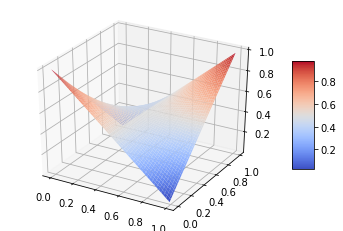

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Esto se construye con tuplas
Y = np.arange(0,1,0.01)
YP = np.arange(0,1,0.01)

# Creamos la malla para el 3D
Y, YP = np.meshgrid(Y, YP)
Z = likelihood(Y, YP)

# Crear una superficie
surf = ax.plot_surface(Y, YP, Z, cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.5, aspect=5)

## Representación
Nuestra función de verosimilitud, tiene máximos justo donde necesitamos que los tenga, por eso los escogimos, donde la predicción y el dato real coinciden en 0, y donde la predicción y el dato real coinciden en 1, por eso decimos que:
Esta función da como resultado probabilidades altas cuando $\hat{y} \sim y$
predicciones del modelo ($\hat{y}$ ) coinciden ($\sim $) con los resultados de las categorías ($y$) del conjunto de datos.


Considerando $p \rightarrow \log(p)$, y sumando la verosimilitud para todos los puntos del dataset obtenemos: 

$$
max{\sum_i \left(y \log \hat{y} + (1-y) \log (1-\hat{y}) \right)} \\
= \min - \sum_i \left( y \log \hat{y} + (1-y) \log (1-\hat{y}) \right)
$$

que es la conocida función de costo para clasificación conocida como Cross-entropy. 

## Regresión logística con Scikit-learn

Recordemos que:

$$
\hat{y} = \frac{1}{1+\exp{(-\text{log-odds})}}
$$
(sigmoide)

donde $\text{log-odds} = \beta_0 + \beta_1 x_1 + \dots \beta_n x_n$ y los betas son los parámetros del modelo.

Aplicaremos un ejercicio de clasificación simple con el dataset Iris: 
* https://en.wikipedia.org/wiki/Iris_flower_data_set
* https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [ ]:
atrib_names =['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
X, y = load_iris(return_X_y=True)

In [ ]:
X[:2]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

In [ ]:
y[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
clf = LogisticRegression(random_state=10, solver='liblinear').fit(X[:100], y[:100])

Revisamos los parámetros resultantes $\beta_i$: 

In [ ]:
clf.coef_

array([[-0.40247392, -1.46382925,  2.23785648,  1.00009294]])

In [ ]:
model_coefs = pd.DataFrame(clf.coef_, columns=atrib_names)
model_coefs

,sepal-length,sepal-width,petal-length,petal-width
0,-0.402474,-1.463829,2.237856,1.000093


## Implementación del método de máxima verosimilitud para la regresión logística

### Definir la función de entorno L(a,b)

In [ ]:
display(Math(r'L(\beta) = \sum_{i=0}^n P_i^{y_i} (1-P_i)^{1-y_i}'))


<IPython.core.display.Math object>

In [ ]:
def likelihood(y, pi):
  import numpy as np
  total_sum = 1
  sum_in = list(range(1, len(y)+ 1))

  for i in range(len(y)):
    sum_in[i] = np.where(y[i] == 1, pi[i], 1-pi[i])
    total_sum = total_sum * sum_in[i]

  return total_sum


### Calcular las probabilidades para cada observación

In [ ]:
display(Math(r'P_i = P(x_i) = \frac{1}{1+e^{-\sum_{j=0}^k\beta_j\cdot x_{ij}}}'))

<IPython.core.display.Math object>

In [ ]:
def logitprobs(X, beta):
  import numpy as np
  n_rows = np.shape(X)[0]
  n_cols = np.shape(X)[1]
  
  pi = list(range(1, n_rows+1))
  expon = list(range(1, n_rows+1))

  for i in range(n_rows):
    expon[i] = 0
    for j in range(n_cols):
      ex = X[i][j] * beta[j]
      expon[i] = ex + expon[i]

    with np.errstate(divide='ignore', invalid='ignore'):
      pi[i] = 1/(1+np.exp(-expon[i]))
  
  return pi

### Calcular la matriz diagonal W

In [ ]:
display(Math(r'W= diag(P_i \cdot (1-P_i))_{i=1}^n'))

<IPython.core.display.Math object>

In [ ]:
def findW(pi):
  import numpy as np
  n = len(pi)
  W = np.zeros(n * n).reshape(n,n)
  
  for i in range(n):
    print(i)
    W[i,i] = pi[i] * (1-pi[i])
    W[i,i].astype(float)

  return W

### Obtener la solución la función logística

#### Newton

In [ ]:
display(Math(r"\beta_{n+1} = \beta_n\frac{f(\beta_n)}{f'(\beta_n)}"))
display(Math(r'f(\beta) = X(Y-P)'))
display(Math(r'f(\beta) = XWX^T'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
def logistics(X, Y, limit):
  import numpy as np
  from numpy import linalg

  nrow = np.shape(X)[0]
  bias = np.ones(nrow).reshape(nrow, 1)
  X_new = np.append(X, bias, axis = 1)
  ncol = np.shape(X_new)[1]
  beta = np.zeros(ncol).reshape(ncol,1)
  root_dif = np.array(range(1, ncol+1)).reshape(ncol,1)

  iter_i = 1000
  while (iter_i > limit):

    print("Iter:i " + str(iter_i) + ', limit: ' +str(limit))
    pi = logitprobs(X_new, beta)
    print(f'pi: {pi}')

    W = findW(pi)
    print(f'W: {W}')

    num = (np.transpose(np.matrix(X_new))*np.matrix(Y - np.transpose(pi)).transpose())
    den = (np.matrix(np.transpose(X_new))*np.matrix(X_new))
    root_dif = np.array(linalg.inv(den)*num)
    beta = beta + root_dif
    print(f'Beta: {beta}')
    iter_i = np.sum(root_dif*root_dif)
    ll = likelihood(Y, pi)
  
  return beta

### Comprobación experimiental

In [ ]:
import numpy as np


In [ ]:
X = np.array(range(10)).reshape(10,1)
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [ ]:
Y = [0,0,0,0,1,0,1,0,1,1]

In [ ]:
bias = np.ones(10).reshape(10,1)
X_new = np.append(X, bias, axis = 1)

In [ ]:
X_new

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.],
       [4., 1.],
       [5., 1.],
       [6., 1.],
       [7., 1.],
       [8., 1.],
       [9., 1.]])

In [ ]:
a = logistics(X, Y, 0.00001)

Iter:i 1000, limit: 1e-05
pi: [array([0.5]), array([0.5]), array([0.5]), array([0.5]), array([0.5]), array([0.5]), array([0.5]), array([0.5]), array([0.5]), array([0.5])]
0
1
2
3
4
5
6
7
8
9
W: [[0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.25 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.25 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.25 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.25 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.25 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.25]]
Beta: [[ 0.10909091]
 [-0.59090909]]
Iter:i 0.36107438016528914, limit: 1e-05
pi: [array([0.35642629]), array([0.38182288]), array([0.40788218]), array([0.43447002]), array([0.46144035]), array([0.48863832]), array([0.51590372]), array([0.54307478]), array([0.56999192]), arr

In [ ]:
ll = likelihood(Y, logitprobs(X,a))

In [ ]:
ll

array([1.48590518e-06])

In [ ]:
Y_a = 0.66220827 * X-3.69557172

### utilizando stats de python

In [ ]:
import statsmodels.api as sm

In [ ]:
# creamos modelo logistico
logit_model = sm.Logit(Y, X_new)


In [ ]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.431012
         Iterations 6


In [ ]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   10
Model:                          Logit   Df Residuals:                        8
Method:                           MLE   Df Model:                            1
Date:                Fri, 25 Nov 2022   Pseudo R-squ.:                  0.3596
Time:                        23:27:31   Log-Likelihood:                -4.3101
converged:                       True   LL-Null:                       -6.7301
Covariance Type:            nonrobust   LLR p-value:                   0.02781
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6622      0.400      1.655      0.098      -0.122       1.446
const         -3.6956      2.289     -1.615      0.106      -8.182       0.791
